In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
df_mat = pd.read_csv(r'..\Data\Extracted\mattilsynet_csv.csv')
df_bron = pd.read_csv(r'..\Data\Extracted\bronnoysund_company_data.csv')

In [4]:
df_mat.columns

Index(['Unnamed: 0', 'tilsynsobjektid', 'org_navn', 'orgnummer', 'adresse',
       'postnr', 'poststed', 'kategori1', 'kategori2', 'kategori3',
       'kategori4', 'karakter1', 'karakter2', 'karakter3', 'karakter4',
       'total_karakter', 'dato', 'tilsynsbesoektype', 'tilsynid', 'sakref',
       'status'],
      dtype='object')

In [5]:
df_bron.columns

Index(['Unnamed: 0', 'organisasjonsnummer', 'navn', 'hjemmeside',
       'registreringsdatoEnhetsregisteret', 'registrertIMvaregisteret',
       'antallAnsatte', 'overordnetEnhet', 'oppstartsdato',
       'organisasjonsform_kode', 'organisasjonsform_beskrivelse',
       'organisasjonsform__links_self_href', 'postadresse_land',
       'postadresse_landkode', 'postadresse_postnummer',
       'postadresse_poststed', 'postadresse_adresse', 'postadresse_kommune',
       'postadresse_kommunenummer', 'naeringskode1_beskrivelse',
       'naeringskode1_kode', 'beliggenhetsadresse_land',
       'beliggenhetsadresse_landkode', 'beliggenhetsadresse_postnummer',
       'beliggenhetsadresse_poststed', 'beliggenhetsadresse_adresse',
       'beliggenhetsadresse_kommune', 'beliggenhetsadresse_kommunenummer',
       'links_self_href', 'links_overordnetEnhet_href', 'datoEierskifte',
       'naeringskode2_beskrivelse', 'naeringskode2_kode',
       'naeringskode3_beskrivelse', 'naeringskode3_kode',
       

In [6]:
features_mat = df_mat[['postnr', 'dato', 'orgnummer']]
X_mat = np.c_[features_mat]
y_mat = np.c_[df_mat['total_karakter']]

In [7]:
print(f'X_mat len : {len(X_mat)}')
print(f'y_mat len : {len(y_mat)}')

X_mat len : 5897
y_mat len : 5897


In [8]:
print(X_mat)
print(y_mat)

[[      461  27042016 971761539]
 [      461  19112019 971761539]
 [      477  22032018 917686149]
 ...
 [      194   9092022 913536835]
 [      179  12122022 929774671]
 [      673  22122022 915566197]]
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [9]:
print(X_mat.data.shape,
y_mat.data.shape)

(5897, 3) (5897, 1)


In [10]:
X_mat_train, X_mat_test, y_mat_train, y_mat_test = train_test_split(X_mat, y_mat, test_size=0.2)

In [11]:
print(f'X_mat_train len : {len(X_mat_train)}')
print(f'X_mat_test len : {len(X_mat_test)}')
print(f'y_mat_train len : {len(y_mat_train)}')
print(f'y_mat_test len : {len(y_mat_test)}')

X_mat_train len : 4717
X_mat_test len : 1180
y_mat_train len : 4717
y_mat_test len : 1180


# Naiv score

In [12]:
pred_naiv = np.mean(y_mat_train)
y_pred_naiv = np.full(y_mat_test.shape, pred_naiv)
print(f'y_pred_naiv : {len(y_pred_naiv)}')

mse_naiv = mean_squared_error(y_mat_test, y_pred_naiv)
print(f'Naiv MSE : {np.sqrt(mse_naiv)}') # 111.1814

mae_naiv = mean_absolute_error(y_mat_test, y_pred_naiv)
print(f'Naiv MAE : {mae_naiv}') # 57.6039

y_pred_naiv : 1180
Naiv MSE : 0.9041206631059148
Naiv MAE : 0.7558019496735572


In [13]:
print(X_mat_train.data.shape)
print(y_mat_train.data.shape)

(4717, 3)
(4717, 1)


# XGBoost Model

In [14]:
regressor = xgb.XGBRegressor(
    early_stopping_rounds = 2,
    max_depth = 3
)

regressor.fit(X_mat_train, y_mat_train, eval_set = [(X_mat_test, y_mat_test)])
importance_check = pd.DataFrame(regressor.feature_importances_.reshape(1,-1), columns = [['postnr', 'dato', 'orgnummer']])


[0]	validation_0-rmse:0.96457
[1]	validation_0-rmse:0.93551
[2]	validation_0-rmse:0.92113
[3]	validation_0-rmse:0.91269
[4]	validation_0-rmse:0.91074
[5]	validation_0-rmse:0.90803
[6]	validation_0-rmse:0.90764
[7]	validation_0-rmse:0.90692
[8]	validation_0-rmse:0.90674
[9]	validation_0-rmse:0.90593
[10]	validation_0-rmse:0.90704


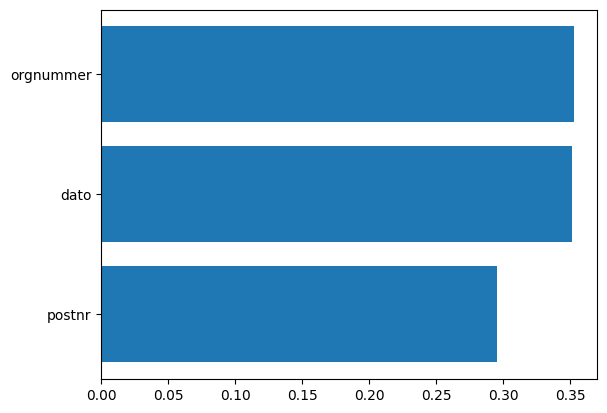

In [15]:
plt.barh(['postnr', 'dato', 'orgnummer'], regressor.feature_importances_)
plt.show()

# Scoring xg

In [16]:
# Train xg
r2_train_xg = regressor.score(X_mat_train, y_mat_train)
print(f'Train R2 XG : {r2_train_xg}')

y_pred_train_xg = regressor.predict(X_mat_train)
mse_train_xg = mean_squared_error(y_mat_train, y_pred_train_xg)
print(f'Train MSE XG : {np.sqrt(mse_train_xg)}')

mae_train_xg = mean_absolute_error(y_mat_train, y_pred_train_xg)
print(f'Train MAE XG : {mae_train_xg}') 

# Test xg
r2_test_xg = regressor.score(X_mat_test, y_mat_test)
print(f'Test R2 XG : {r2_test_xg}') 

y_pred_test_xg = regressor.predict(X_mat_test)
mse_test_xg = mean_squared_error(y_mat_test, y_pred_test_xg)
print(f'Test MSE XG : {np.sqrt(mse_test_xg)}') 

mae_test_xg = mean_absolute_error(y_mat_test, y_pred_test_xg)
print(f'Train MAE XG : {mae_test_xg}')

Train R2 XG : 0.05010813838805639
Train MSE XG : 0.881172594606148
Train MAE XG : 0.7456137792700702
Test R2 XG : -0.005055206642450072
Test MSE XG : 0.9059345285447608
Train MAE XG : 0.7632172070317349
